In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests

url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"
response = requests.get(url)
response

<Response [200]>

In [3]:
import requests

r = requests.get('https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b')
r.status_code

200

In [4]:
html = r.content

In [5]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(html, 'html.parser')

In [6]:
import requests
from bs4 import BeautifulSoup
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', attrs={'class': 'pubtables'})


data_list = []


headers = [header.get_text(strip=True) for header in table.find_all('th')]

for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if not cells:
        continue 
    row_data = {headers[i]: cell.get_text(strip=True) for i, cell in enumerate(cells, start=1)}
    row_data[headers[0]] = row.find('th', {"class": "stub"}).get_text(strip=True)  
    data_list.append(row_data)


for data in data_list:
    print(data)


{'SVBFG total assets (thousands)': '51,218,567', 'SVBFG asset growth index': '100.00', 'Industry total assets (thousands)': '21,139,938,363', 'Industry asset growth index': '100.00', 'Date': '12/31/2017'}
{'SVBFG total assets (thousands)': '57,020,489', 'SVBFG asset growth index': '111.33', 'Industry total assets (thousands)': '21,713,363,144', 'Industry asset growth index': '102.71', 'Date': '12/31/2018'}
{'SVBFG total assets (thousands)': '71,384,015', 'SVBFG asset growth index': '139.37', 'Industry total assets (thousands)': '22,487,585,206', 'Industry asset growth index': '106.37', 'Date': '12/31/2019'}
{'SVBFG total assets (thousands)': '116,046,446', 'SVBFG asset growth index': '226.57', 'Industry total assets (thousands)': '26,020,554,981', 'Industry asset growth index': '123.09', 'Date': '12/31/2020'}
{'SVBFG total assets (thousands)': '211,483,000', 'SVBFG asset growth index': '412.90', 'Industry total assets (thousands)': '28,104,384,426', 'Industry asset growth index': '132.

In [7]:
import pandas as pd

svbfg_banking_liabilities = pd.DataFrame(data_list)
svbfg_banking_liabilities


C:\Users\deivi\AppData\Local\Temp\ipykernel_4112\747033227.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,SVBFG total assets (thousands),SVBFG asset growth index,Industry total assets (thousands),Industry asset growth index,Date
0,"51,218,567",100.00,"21,139,938,363",100.00,12/31/2017
1,"57,020,489",111.33,"21,713,363,144",102.71,12/31/2018
2,"71,384,015",139.37,"22,487,585,206",106.37,12/31/2019
3,"116,046,446",226.57,"26,020,554,981",123.09,12/31/2020
4,"211,483,000",412.90,"28,104,384,426",132.94,12/31/2021
5,"211,786,000",413.49,"27,971,816,824",132.32,12/31/2022


In [8]:


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="083b5f8e")  # Adjusted to use the specific ID provided


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    headers = [header.get_text(strip=True) for header in table.find_all('th')]

   
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    us_venture_capital = pd.DataFrame(data_list)

us_venture_capital


,Period,Deal value (billions of $),Deal count
0,2107; Q1,$18.6,"3,125"
1,2017; Q2,$22.8,"2,913"
2,2017; Q3,$25.4,"2,798"
3,2017; Q4,$23.4,"2,831"
4,2018; Q1,$30.7,"3,319"
5,2018; Q2,$32.0,"2,996"
6,2018; Q3,$35.0,"2,823"
7,2018; Q4,$48.1,"3,178"
8,2019; Q1,$40.6,"3,666"
9,2019; Q2,$37.4,"3,283"


In [9]:

url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="20614f67")  # Using the specific ID for accurate targeting


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svbfg_liabilities = pd.DataFrame(data_list)

svbfg_liabilities

,Period,Other Liabilities,Subordinated Notes and Debentures,Other Borrowed Money,Interest-Bearing Foreign Deposits,Non-Interest-Bearing Foreign Deposits,Interest-Bearing Domestic Deposits,Non-Interest-Bearing Domestic Deposits,Total
0,2017; Q1,"673,880","741,015","7,876","1,956,534","686,949","5,535,233","32,914,830","42,516,317"
1,2017; Q2,"1,198,234","695,023","32,326","2,128,921","903,321","5,289,999","34,147,438","44,395,262"
2,2017; Q3,"1,040,547","695,256","4,840","2,288,149","993,344","5,661,863","35,875,567","46,559,566"
3,2017: Q4,"1,236,305","695,492","705,557","2,228,958","1,095,885","5,369,619","35,567,336","46,899,152"
4,2018; Q1,"1,589,102","695,731","707,425","2,546,683","1,072,766","5,874,494","37,273,552","49,759,753"
5,2018; Q2,"1,061,533","695,972","418,612","2,554,398","1,089,045","5,739,595","39,541,471","51,100,626"
6,2018; Q3,"1,513,178","696,217","2,259,781","2,344,474","1,767,682","5,777,862","38,749,523","53,108,717"
7,2018; Q4,"1,324,241","696,465","312,380","3,436,435","1,298,850","6,789,042","37,898,233","51,755,646"
8,2019; Q1,"1,416,338","696,716","219,631","3,044,840","1,813,797","10,003,645","37,590,531","54,785,498"
9,2019; Q2,"1,539,392","696,970","219,578","3,421,445","1,453,575","12,857,606","37,906,317","58,094,883"


In [10]:


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="cd93c7cc")


if table is None:
    print("No table found with the specified attributes.")
else:
   
    data_list = []

   
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

 
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    deposit_sv= pd.DataFrame(data_list)

deposit_sv

,Period,Insured domestic deposits,Uninsured domestic deposits,Total
0,Q1 2017,3.56,35.45,39.01
1,Q2 2017,3.65,36.20,39.84
2,Q3 2017,4.09,37.90,41.99
3,Q4 2017,4.05,37.37,41.42
4,Q1 2018,4.09,39.57,43.65
5,Q2 2018,4.38,41.53,45.91
6,Q3 2018,4.54,40.62,45.16
7,Q4 2018,5.71,39.55,45.26
8,Q1 2019,5.86,42.06,47.92
9,Q2 2019,6.58,44.49,51.07


In [11]:


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  

soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="7bd746eb")


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    headers = [header.get_text(strip=True) for header in table.find_all('th')]

   
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    composition_svbfg_assets= pd.DataFrame(data_list)


composition_svbfg_assets['Period'] =composition_svbfg_assets['Period'].str.replace(' ', '')

financial_columns = ['Other', 'Loans/leases held for investment, net of ALLL', 
                     'Held-to-maturity securities', 'Available-for-sale securities', 'Total assets']
for column in financial_columns:
   composition_svbfg_assets[column] =composition_svbfg_assets[column].str.replace(',', '').astype(int)

composition_svbfg_assets.head()


  


,Period,Other,"Loans/leases held for investment, net of ALLL",Held-to-maturity securities,Available-for-sale securities,Total assets
0,Q12017,34030432,20184321,8615695,12389341,46419773
1,Q22017,36360561,20739970,9938371,12074736,48435297
2,Q32017,38150233,21940317,11055006,12606631,50756864
3,Q42017,40094684,22851292,12663455,11123883,51218567
4,Q12018,44239093,24313650,14548855,10080384,54319477


In [12]:


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="e2da4a3a")


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)


unrelized_gains_svbfg = pd.DataFrame(data_list)
unrelized_gains_svbfg['Date'] = unrelized_gains_svbfg['Date'].str.replace(';', ':').str.replace(' ', '')
unrelized_gains_svbfg['Held-to-maturity'] = unrelized_gains_svbfg['Held-to-maturity'].str.replace(',', '').astype(int)
unrelized_gains_svbfg['Available-for-sale'] = unrelized_gains_svbfg['Available-for-sale'].str.replace(',', '').astype(int)
unrelized_gains_svbfg['Total'] = unrelized_gains_svbfg['Total'].str.replace(',', '').astype(int)


unrelized_gains_svbfg.head()



,Date,Held-to-maturity,Available-for-sale,Total
0,2017:Q1,-47878,23263,-24615
1,2017:Q2,-27866,17747,-10119
2,2017:Q3,-31591,18773,-12818
3,2017:Q4,-115176,-10344,-125520
4,2018:Q1,-319415,-108688,-428103


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

response = requests.get(url)
response.raise_for_status()  

soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="c1c8c3ef")


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

stock_price_performance = pd.DataFrame(data_list)


import matplotlib.pyplot as plt

# Convert 'Date' bto datetime
stock_price_performance['Date'] = pd.to_datetime(stock_price_performance['Date'])

# Fill missing values in 'SVBFG' via interpolation
stock_price_performance['SVBFG'] = stock_price_performance['SVBFG'].interpolate()

# Verify the changes and check for any remaining missing values



C:\Users\deivi\AppData\Local\Temp\ipykernel_4112\2267877614.py:38: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  stock_price_performance['SVBFG'] = stock_price_performance['SVBFG'].interpolate()


In [14]:
file_path = r'C:\Users\deivi\Downloads\stock_price_performance.csv'
stock_price_performance1 = pd.read_csv(file_path)
stock_price_performance1.head()

,Date,SVBFG,S&P 500 index,KBW bank index
0,1/3/2017,100.00,100.00,100.00
1,1/4/2017,103.99,100.57,101.11
2,1/5/2017,101.77,100.50,99.69
3,1/6/2017,103.14,100.85,100.10
4,1/9/2017,101.28,100.49,99.41


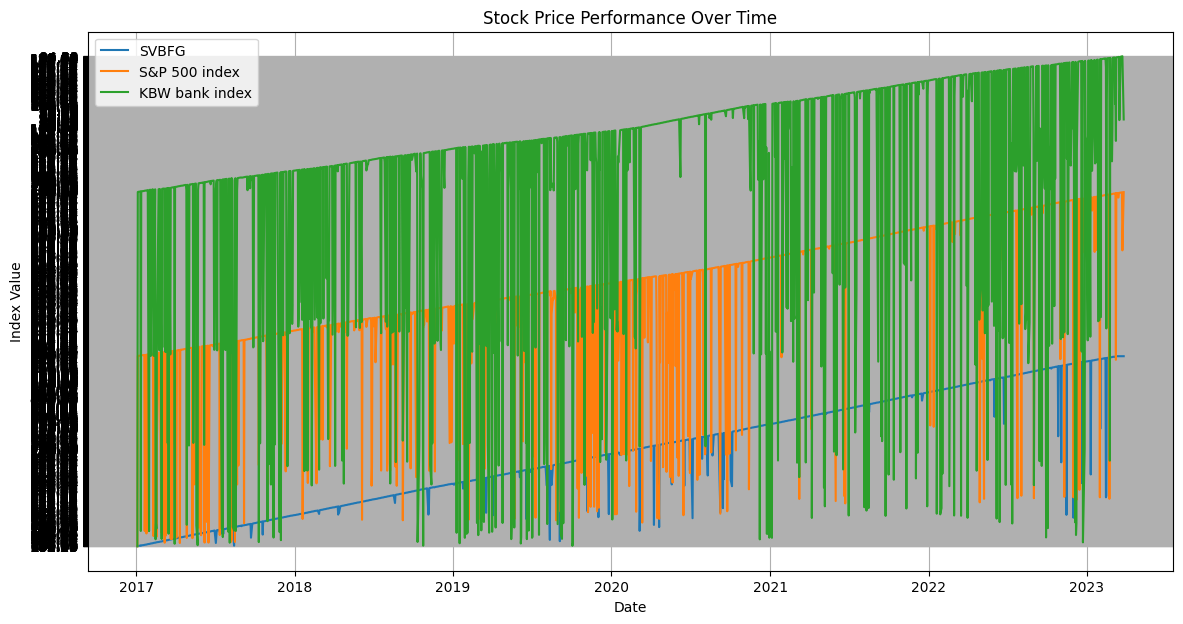

In [20]:
import matplotlib.pyplot as plt



# Convert 'Date' column to datetime
stock_price_performance['Date'] = pd.to_datetime(stock_price_performance['Date'])

# Plotting the time series for each stock/index
plt.figure(figsize=(14, 7))
plt.plot(stock_price_performance['Date'], stock_price_performance['SVBFG'], label='SVBFG', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance['Date'], stock_price_performance['S&P 500 index'], label='S&P 500 index', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance['Date'], stock_price_performance['KBW bank index'], label='KBW bank index', marker='o', linestyle='-', markersize=0)

plt.title('Stock Price Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status() 


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="cca52f2c")


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svb_number_of_supervisory_issues = pd.DataFrame(data_list)


svb_number_of_supervisory_issues

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="92d39d9f")

# Check if the table is found
if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    supervision_staffing_relative_to_banking_industry_assets = pd.DataFrame(data_list)


supervision_staffing_relative_to_banking_industry_assets

In [ ]:
# URL of the webpage
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="cfea0852")

# Check if the table is found
if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    svbfg_supervision_hours_relative_to_assets = pd.DataFrame(data_list)


svbfg_supervision_hours_relative_to_assets.to_csv("svbfg_supervision_hours_relative_to_assets.csv", index=False)

In [ ]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="2d0a427e")

# Check if the table is found
if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    svbfg_supervision_issues = pd.DataFrame(data_list)


svbfg_supervision_issues.to_csv("svbfg_supervision_issues.csv", index=False)

In [ ]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="b93a2160")

if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    svbfg_supervision_resources_comparison = pd.DataFrame(data_list)


svbfg_supervision_resources_comparison.to_csv("svbfg_supervision_resources_comparison.csv", index=False)

In [ ]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="27f04ade")

if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    svbfg_supervision_risk_reserve_federal = pd.DataFrame(data_list)


svbfg_supervision_risk_reserve_federal.to_csv("svbfg_supervision_risk_reserve_federal.csv", index=False)

In [ ]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

# Send a GET request
response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the specific table by using the exact 'id' for "Estimated unrealized gains (losses) on SVBFG's investment portfolio securities"
table = soup.find('table', id="87d70bcf")

if table is None:
    print("No table found with the specified attributes.")
else:
    # Initialize a list to hold all the extracted data
    data_list = []

    # Extract the headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  # Skip rows without cells
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    # Convert the list of dictionaries to a DataFrame
    svbfg_common_equity_tier_1_capital_ratios = pd.DataFrame(data_list)


svbfg_common_equity_tier_1_capital_ratios.to_csv("svbfg_common_equity_tier_1_capital_ratios.csv", index=False)

In [ ]:
# Preparing for merging by adjusting the date format in assets_composition_df to match unrealized_gains_df

# Convert the 'Period' in assets_composition_df to a format that matches the 'Date' in unrealized_gains_df
composition_svbfg_assets['Date'] = composition_svbfg_assets['Period'].apply(
    lambda x: f"{x[2:]}:Q{x[1]}"
)

# Merging the datasets on the 'Date' column
merged_df = pd.merge(unrelized_gains_svbfg,composition_svbfg_assets, on='Date', how='inner')

# Display the merged DataFrame
merged_df.head()


In [ ]:
import matplotlib.pyplot as plt

merged_df['Loans_to_Total'] = merged_df['Loans/leases held for investment, net of ALLL'] / merged_df['Total assets']
merged_df['HTM_to_Total'] = merged_df['Held-to-maturity securities'] / merged_df['Total assets']
merged_df['AFS_to_Total'] = merged_df['Available-for-sale securities'] / merged_df['Total assets']


fig, ax = plt.subplots(2, 1, figsize=(12, 12))


ax[0].plot(merged_df['Date'], merged_df['Loans_to_Total'], label='Loans to Total Assets', marker='o')
ax[0].plot(merged_df['Date'], merged_df['HTM_to_Total'], label='HTM to Total Assets', marker='o')
ax[0].plot(merged_df['Date'], merged_df['AFS_to_Total'], label='AFS to Total Assets', marker='o')
ax[0].set_title('Asset Category Ratios to Total Assets Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Ratio')
ax[0].legend()
ax[1].plot(merged_df['Date'], merged_df['Total'], label='Total Unrealized Gains/Losses', color='red', marker='x')
ax[1].set_title('Total Unrealized Gains/Losses Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total Unrealized Gains/Losses')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#1. Asset Category Ratios to Total Assets Over Time
This plot displays the ratios of loans, held-to-maturity (HTM) securities, and available-for-sale (AFS) securities to total assets. Observing these trends can reveal how the bank's asset allocation strategies changed over time and potentially indicate risk concentrations or diversification efforts.

2. Total Unrealized Gains/Losses Over Time
This graph illustrates the total unrealized gains and losses across the periods. Changes in this metric can reflect both market conditions and the bank's responsiveness to these conditions, influencing the bank's financial stability.

Insights:
Correlations: By comparing these two plots, you can look for correlations between asset allocation strategies and financial outcomes, such as whether shifts towards more HTM or AFS securities correlate with periods of increased unrealized losses.
Risk Exposure: Analyzing periods of significant unrealized losses can help identify if high concentrations in certain asset categories correspond to higher risk exposure.
Recommendations:
Diversification: Ensuring a balanced mix of asset categories can mitigate risk.
Regular Reviews: Regularly reviewing and adjusting asset allocations in response to changing market conditions can enhance financial stability.
Risk Management: Developing robust risk management frameworks that adjust to asset composition changes.b

In [ ]:
# Analyzing the deposit data (deposit_sv_df)

# Calculate the ratio of insured to uninsured deposits
deposit_sv_df['Insured_to_Uninsured_Ratio'] = deposit_sv_df['Insured domestic deposits'] / deposit_sv_df['Uninsured domestic deposits']

# Plot the trends of insured vs. uninsured deposits and their ratio over time
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('Insured vs Uninsured Deposits', color=color)
ax1.plot(deposit_sv_df['Period'], deposit_sv_df['Insured domestic deposits'], label='Insured Deposits', color='red', marker='o')
ax1.plot(deposit_sv_df['Period'], deposit_sv_df['Uninsured domestic deposits'], label='Uninsured Deposits', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Insured to Uninsured Ratio', color=color)  # we already handled the x-label with ax1
ax2.plot(deposit_sv_df['Period'], deposit_sv_df['Insured_to_Uninsured_Ratio'], label='Insured to Uninsured Ratio', color='green', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Trends in Insured vs. Uninsured Deposits and their Ratio')
plt.show()


In [ ]:
# Calculating the year-over-year percentage change in CET1 ratios for both SVBFG and SVB
cet1_capital_ratios_df['SVBFG YoY Change'] = cet1_capital_ratios_df['SVBFG'].pct_change() * 100
cet1_capital_ratios_df['SVB YoY Change'] = cet1_capital_ratios_df['SVB'].pct_change() * 100

# Plotting the year-over-year changes
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(cet1_capital_ratios_df['Period'], cet1_capital_ratios_df['SVBFG YoY Change'], label='SVBFG CET1 YoY Change (%)', marker='o', color='blue')
ax.plot(cet1_capital_ratios_df['Period'], cet1_capital_ratios_df['SVB YoY Change'], label='SVB CET1 YoY Change (%)', marker='o', color='red')

ax.set_title('Year-over-Year Change in CET1 Ratios')
ax.set_xlabel('Period')
ax.set_ylabel('Percentage Change (%)')
ax.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plotting trends in total deposits over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total deposits
ax1.bar(deposit_sv_df['Period'], deposit_sv_df['Total'], color='gray', label='Total Deposits')
ax1.set_xlabel('Period')
ax1.set_ylabel('Total Deposits ($ billions)', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_title('Total Deposits and Insured to Uninsured Deposits Ratio Over Time')
ax1.legend(loc='upper left')

# Create a second y-axis to plot the ratio of insured to uninsured deposits
ax2 = ax1.twinx()
ax2.plot(deposit_sv_df['Period'], deposit_sv_df['Insured_to_Uninsured_Ratio'], label='Insured to Uninsured Ratio', color='blue', marker='o')
ax2.set_ylabel('Insured to Uninsured Ratio', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()
#The visualization above includes two key aspects of liquidity analysis for Silicon Valley Bank:

#Total Deposits: The bar graph shows the total deposits over time, which can help us understand the general trend in deposit growth or decline. Any sharp declines might indicate periods of high withdrawal, which is critical for assessing liquidity risk.

#Insured to Uninsured Ratio: The line graph overlays the ratio of insured to uninsured deposits. A lower ratio suggests higher exposure to the risk of large-scale withdrawals, as uninsured depositors might be more likely to pull funds in times of uncertainty or bank distress.

#Key Observations:
#Fluctuations in Total Deposits: Note any periods where there's a noticeable drop or slower growth in total deposits, as these could indicate emerging liquidity issues.
#Changes in Deposit Coverage: The ratio of insured to uninsured deposits provides insight into the deposit base's stability. Sharp changes in this ratio could indicate shifts in depositor confidence or the bank's deposit structure.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime for better plotting
stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'])

# Plotting the normalized stock prices of SVBFG, S&P 500, and KBW Bank Index
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(stock_price_df['Date'], stock_price_df['SVBFG'], label='SVBFG', color='blue', marker='None', linestyle='-')
ax.plot(stock_price_df['Date'], stock_price_df['S&P 500 index'], label='S&P 500', color='green', marker='None', linestyle='--')
ax.plot(stock_price_df['Date'], stock_price_df['KBW bank index'], label='KBW Bank Index', color='red', marker='None', linestyle=':')

ax.set_title('Stock Price Performance of SVBFG Compared to Market Indices')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price Index (Base 100 on 1/3/2017)')
ax.legend()

plt.grid(True)
plt.show()
